<a href="https://colab.research.google.com/github/parjanyahk/camCalibOpenCV/blob/main/cam_calib_OCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import statements
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob

In [2]:
# Dimensions of the checkerboard
chkrbrd = (6, 8)

In [3]:
# To stop the iteration when specified number of iterations are completed or specified accuracy is reached
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
# Vector for 3D points
vect_3D_pts = []

# Vector for 2D points
vect_2D_pts = []

In [5]:
# 3D points real world coord
objectp3d = np.zeros((1, chkrbrd[0] * chkrbrd[1], 3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:chkrbrd[0], 0:chkrbrd[1]].T.reshape(-1, 2)

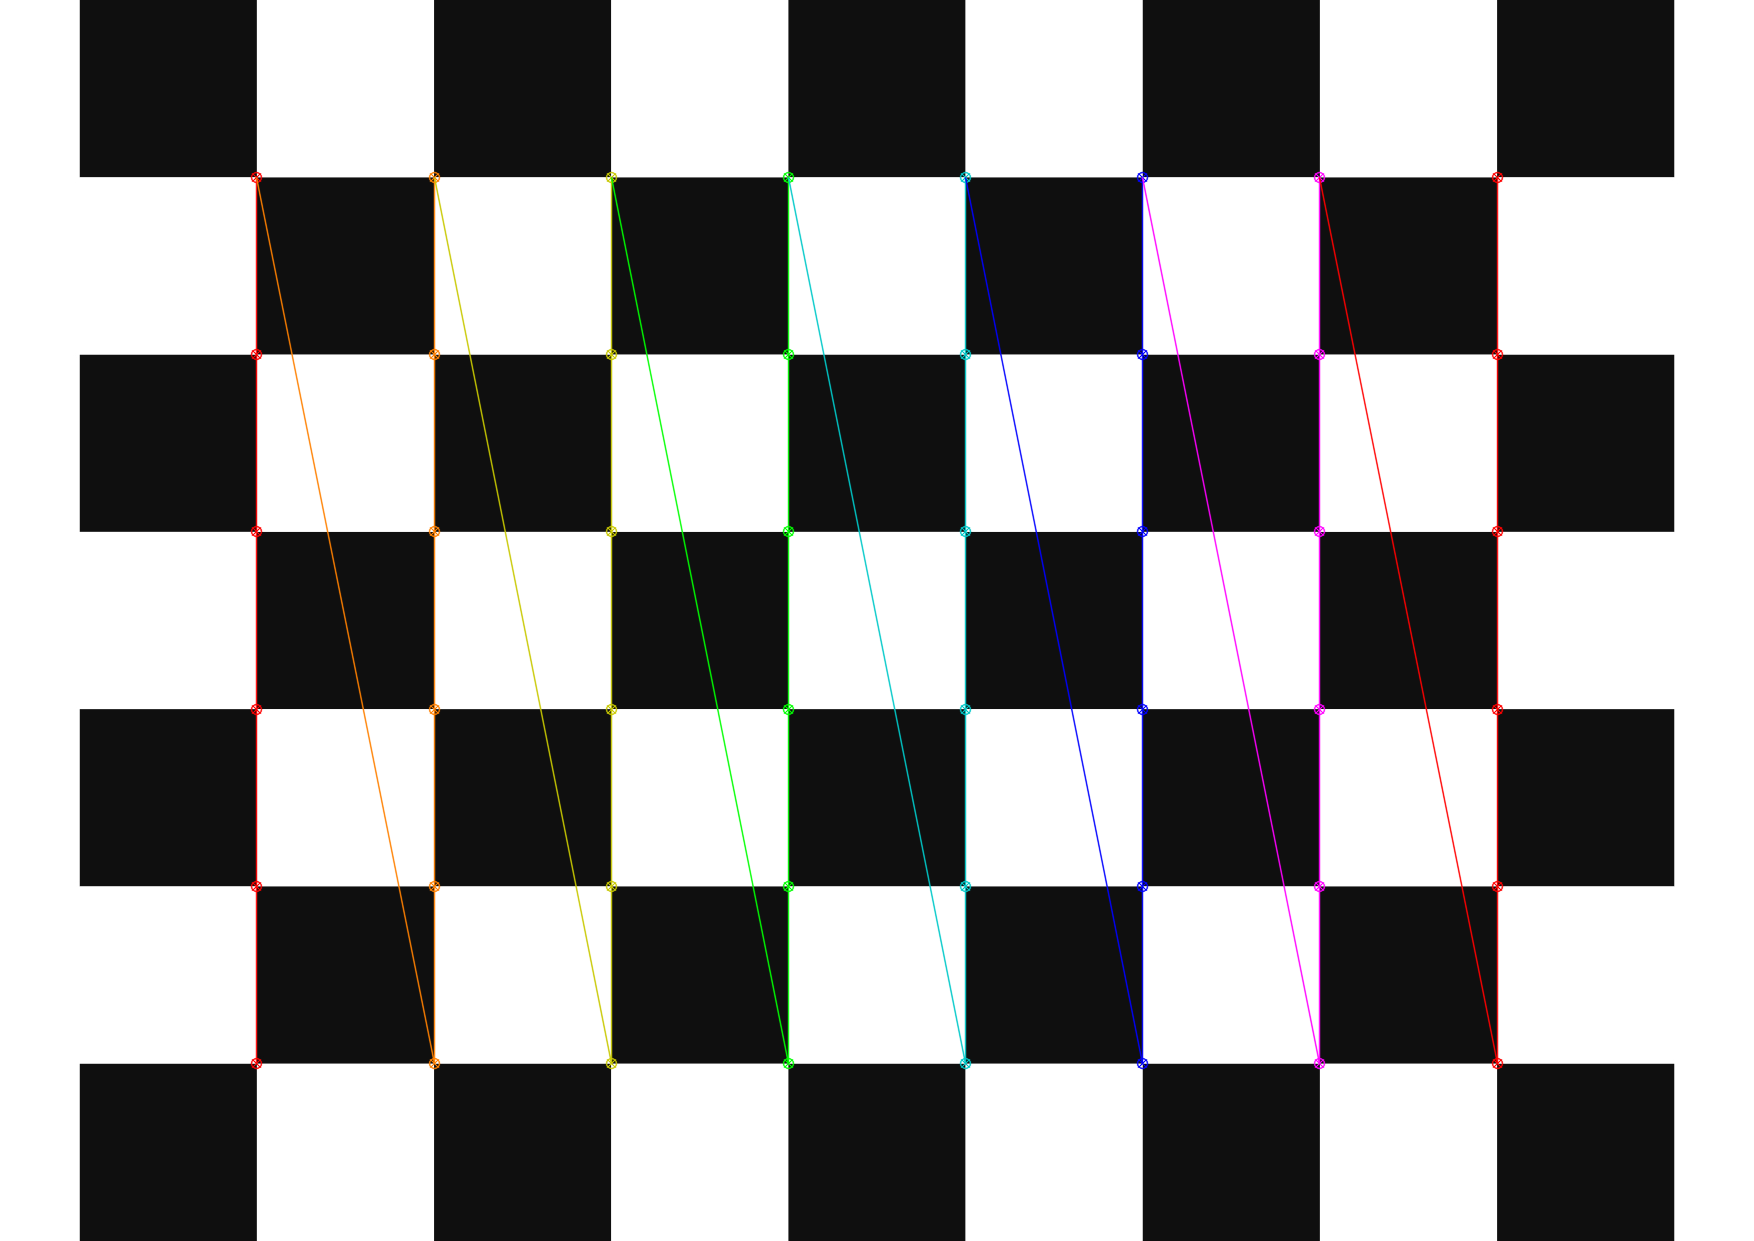

In [6]:
# Path of image stored here it is the pwd
images = glob.glob('*.jpg')

for fname in images:
	image = cv2.imread(fname)
	grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# Find the chess board corners,
	# If desired number of corners are found in the image then ret = true
	ret, corners = cv2.findChessboardCorners(grayColor, chkrbrd, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK 
                                          + cv2.CALIB_CB_NORMALIZE_IMAGE)

	'''If desired number of corners can be detected then,
	refine the pixel coordinates and display them on the images of checker board'''
	if ret == True:
		vect_3D_pts.append(objectp3d)

		# Refining, extracting pixel coordinates for given 2d points.
		corners2 = cv2.cornerSubPix(grayColor, corners, (11, 11), (-1, -1), criteria)

		vect_2D_pts.append(corners2)

		# Draw and display the corners
		image = cv2.drawChessboardCorners(image, chkrbrd, corners2, ret)
	cv2_imshow(image)
	cv2.waitKey(0)

cv2.destroyAllWindows()

h, w = image.shape[:2]

In [7]:
''' Perform camera calibration by passing the value of above found out 3D points (vect_3D_pts) 
 and its corresponding pixel coordinates of the detected corners (vect_2D_pts)'''
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(vect_3D_pts, vect_2D_pts, grayColor.shape[::-1], None, None)


# Displaying output
print(" Camera Matrix:")
print(matrix)

print("\n Distortion Coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

 Camera Matrix:
[[1.89568341e+04 0.00000000e+00 3.78012018e+02]
 [0.00000000e+00 1.89677602e+04 6.25521828e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion Coefficient:
[[ 7.01408298e-01 -1.00249037e+02  5.38118725e-06 -1.00495311e-04
   1.96601664e-01]]

 Rotation Vectors:
(array([[ 0.01084087],
       [-0.01086014],
       [-1.57077046]]),)

 Translation Vectors:
(array([[ -0.68637384],
       [  2.4686975 ],
       [107.02470367]]),)


In [ ]:
'''
What is camera calibration?

The process of estimating the parameters of a camera is called camera calibration.

This means we have all the information (parameters or coefficients) about the camera required to determine an accurate relationship 
between a 3D point in the real world and its corresponding 2D projection (pixel) in the image captured by that calibrated camera.

Typically this means recovering two kinds of parameters

Internal parameters of the camera/lens system. E.g. focal length, optical center, and radial distortion coefficients of the lens.
External parameters : This refers to the orientation (rotation and translation) of the camera with respect to some world coordinate system.
'''

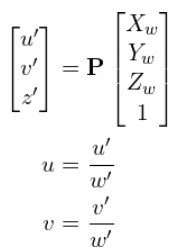

In [9]:
'''

Explain the mathematical basis of how the checkerboard pattern helps in this calibration.

to find the projection of a 3D point onto the image plane, we first need to transform the point from world coordinate system to the 
camera coordinate system using the extrinsic parameters (Rotation {R} and Translation {t})

using the intrinsic parameters of the camera, we project the point onto the image plane.
The equations that relate 3D point (X_w, Y_w, Z_w) in world coordinates to its projection (u, v) in the image coordinates

'''
fig1 = cv2.imread("/content/fig1.png")
cv2_imshow(fig1)

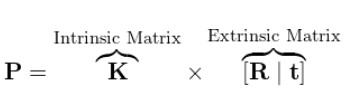

In [10]:
'''

Where, {P} is a 3×4 Projection matrix consisting of two parts — the intrinsic matrix (K) that contains the intrinsic parameters and 
the extrinsic matrix ([{R} |{t}|] ) that is combination of 3×3 rotation matrix {R} and a 3×1 translation {t} vector.

'''
fig2 = cv2.imread("/content/fig2.png")
cv2_imshow(fig2)

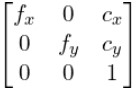

In [11]:
'''

The goal of the calibration process is to find the 3×3 matrix K, the 3×3 rotation matrix {R}, and the 3×1 translation vector {t} 
using a set of known 3D points (X_w, Y_w, Z_w) and their corresponding image coordinates (u, v). 
When we get the values of intrinsic and extrinsic parameters the camera is said to be calibrated.

In summary, a camera calibration algorithm has the following inputs and outputs

Inputs : A collection of images with points whose 2D image coordinates and 3D world coordinates are known.
Outputs: The 3×3 camera intrinsic matrix, the rotation and translation of each image.

'''
fig3 = cv2.imread("/content/fig3.png")
cv2_imshow(fig3)

In [ ]:
'''

Are there some alternate means by which a camera can be calibrated?

Following are the major types of camera calibration methods:

Calibration pattern: 
When we have complete control over the imaging process, the best way to perform calibration 
is to capture several images of an object or pattern of known dimensions from different view points. 
The checkerboard based method that we will learn in this post belongs to this category. 
We can also use circular patterns of known dimensions instead of checker board pattern.

Geometric clues: 
Sometimes we have other geometric clues in the scene like straight lines and vanishing points which can be used for calibration.

Deep Learning based: 
When we have very little control over the imaging setup (e.g. we have a single image of the scene), 
it may still be possible to obtain calibration information of the camera using a Deep Learning based method.
'''

In [ ]:
''' 
References:
[1] Camera Calibration Documentation - https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html
[2] Camera Calibration Theory - https://learnopencv.com/camera-calibration-using-opencv/
'''